<a href="https://colab.research.google.com/github/quoctrungsz27/week7_AI/blob/main/Adversing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

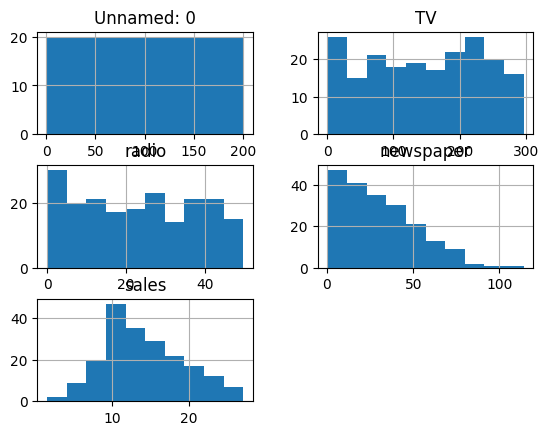

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Doc file CSV
url = '/content/drive/MyDrive/Colab Notebooks/File .CSV Week7_AI/Advertising.csv'
data = pd.read_csv(url)

# Hien thi bieu do Histogram
data.hist()
plt.show()

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


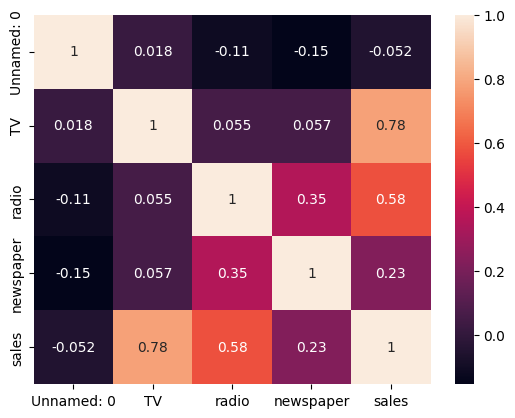

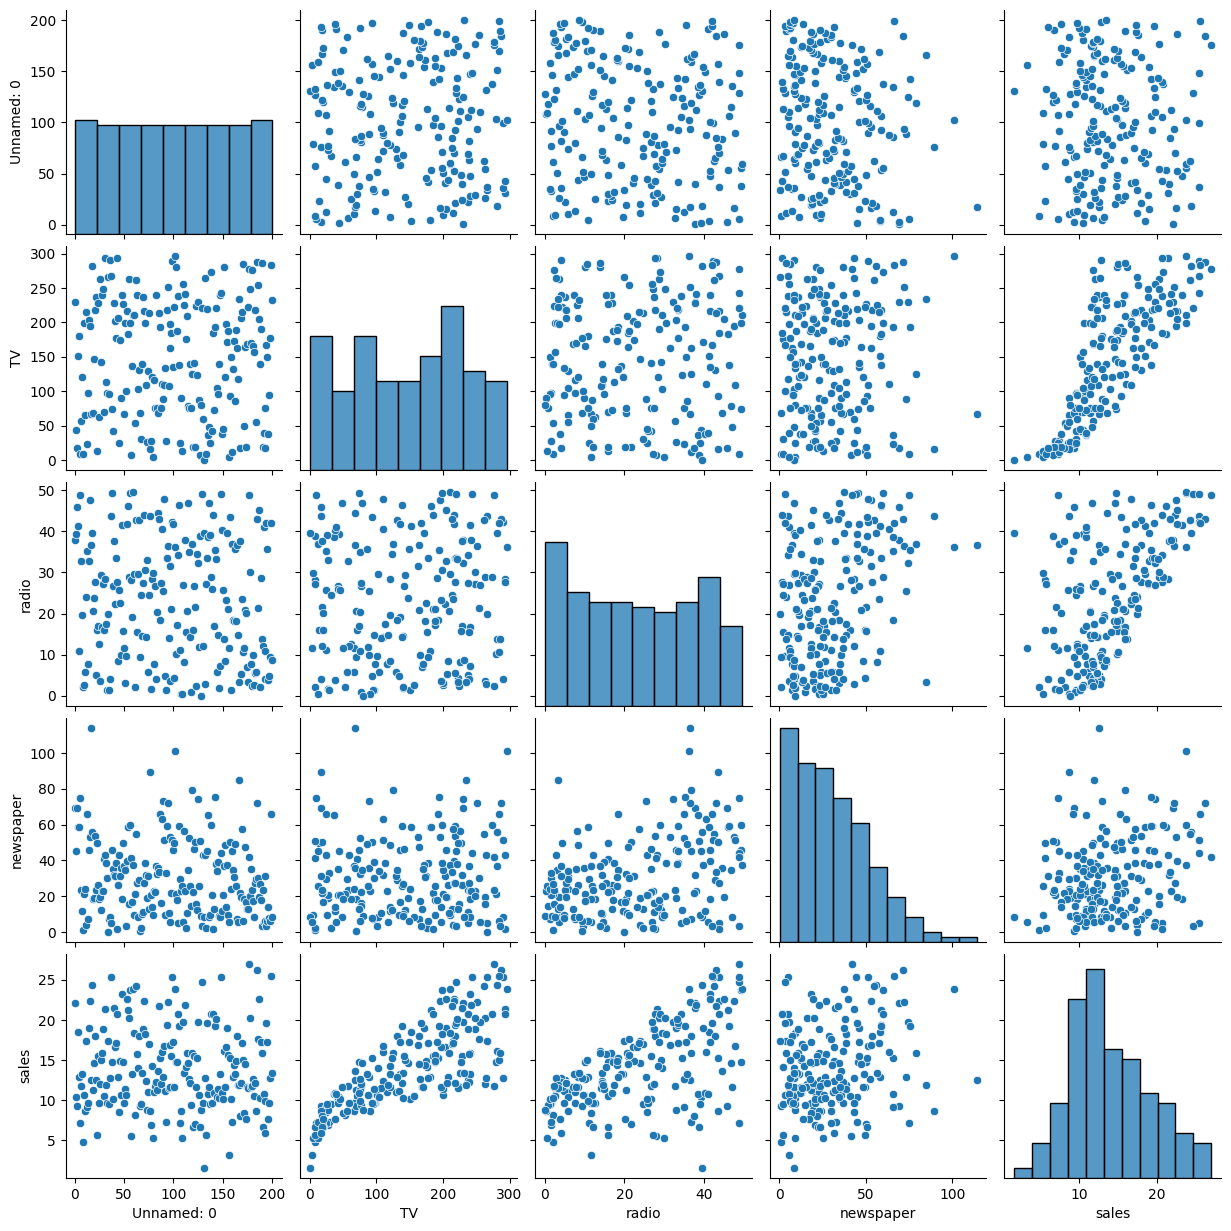

In [2]:

import seaborn as sns

# Bang phan phoi va tuong quan dung thu vien seaborn
correlation = data.corr()
print(correlation)

sns.heatmap(correlation,annot = True)
sns.pairplot(data)

#TV anh huong nhieu nhat toi sales (0.78)  ( bac 2 tro len)

In [3]:
from sklearn import linear_model 

# Mo hinh hoi quy tuyen tinh
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['TV']),y = data['sales'])

print('Intercept cua mo hinh:',model.intercept_)
print('Coffient cua mo hinh:',model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X=pd.DataFrame(data['TV']),y = data['sales']))
# y = coef*x + intercept

Intercept cua mo hinh: 7.032593549127695
Coffient cua mo hinh: [0.04753664]
Do chinh xac cua mo hinh: 0.611875050850071


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


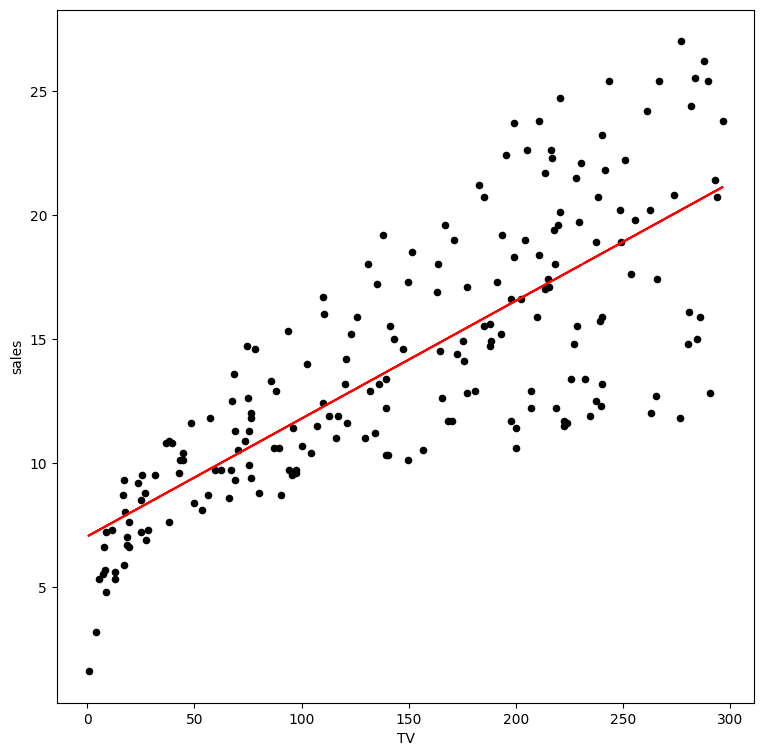

In [4]:
# Hoi quy Bac 1

# Ve phan bo
data.plot(kind = 'scatter',x='TV',y='sales',figsize=(9,9),color ='black')
y_pred = model.predict(X=pd.DataFrame(data['TV']))

# Ve duong tuyen tinh
plt.plot(data['TV'],y_pred,color = 'red')

In [5]:

import numpy as np

# Mo hinh hoi quy tuyen tinh
model = linear_model.LinearRegression()
X=pd.DataFrame([data['TV'],data['TV']**2,data['TV']**3,data['TV']**4,data['TV']**5,data['TV']**6]).T
model.fit(X,y = data['sales'])

print('Intercept cua mo hinh:',model.intercept_)
print('Coffient cua mo hinh:',model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X,y= data['sales']))

Intercept cua mo hinh: 3.102716603611796
Coffient cua mo hinh: [ 3.20782063e-01 -5.67064291e-03  5.26589322e-05 -2.38512694e-07
  5.06399495e-10 -3.94395454e-13]
Do chinh xac cua mo hinh: 0.629177812047104


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


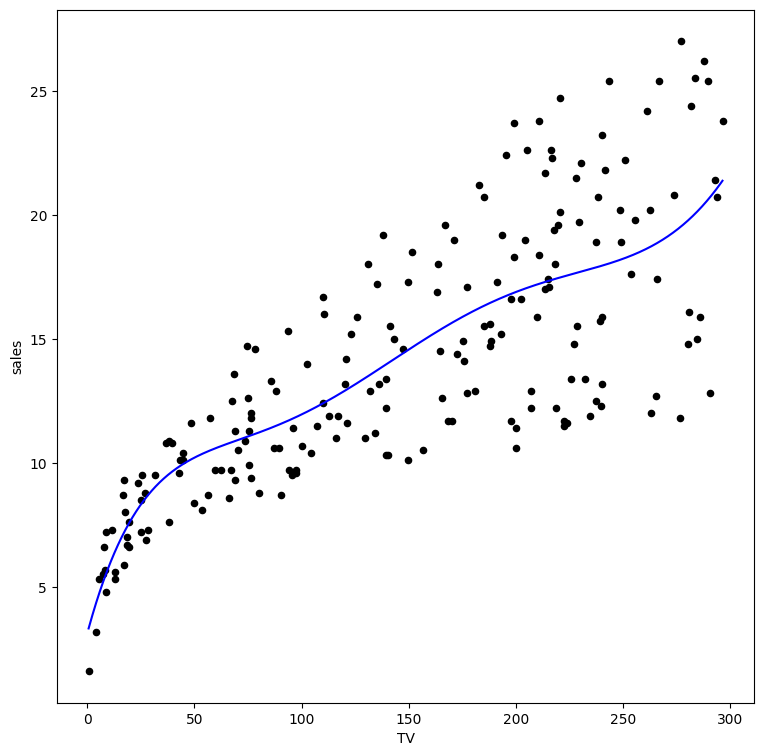

In [6]:

data.plot(kind = 'scatter',x='TV',y='sales',figsize=(9,9),color ='black')
range = np.arange(0.7,296.4,0.1)
predictor = pd.DataFrame([range ,range**2,range**3,range**4,range**5,range**6]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred,color = 'blue') 